In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

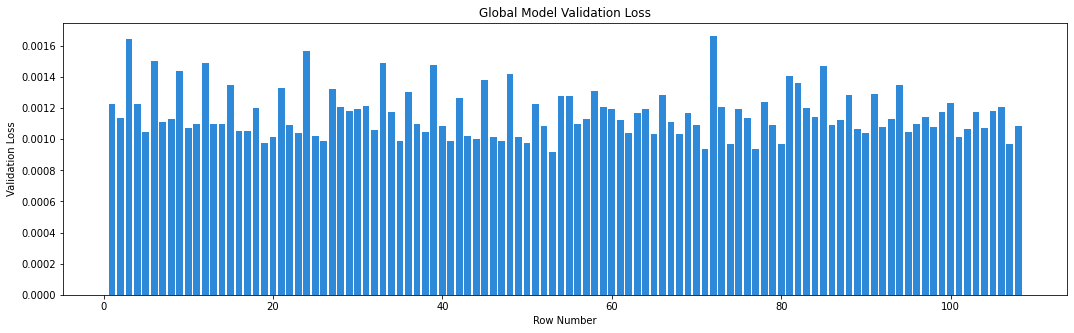

<Figure size 432x288 with 0 Axes>

In [68]:
nmon_metric_options = [
    ("timestamp", "Timestamp MS since Epoch", [0, 80], "timestamp"), #0
    ("CPU_ALL:User%", "CPU Total: User %", [0,100], "cpu_all_user_percent"), # 1
    ("CPU_ALL:Sys%", "CPU Total: System %", [0,100], "cpu_all_system_percent"), # 2
    ("MEM:memtotal", "Memory MB: Total", [0,65000], "mem_MB_total"), #3
    ("MEM:hightotal", "Memory MB: High Total", [0,65000], "mem_MB_high_total"), #4
    ("MEM:lowtotal", "Memory MB: Low Total", [0,65000], "mem_MB_low_total"), #5
    ("MEM:swapfree", "Memory MB: Swap Free", [0,1000], "mem_MB_swap_free"), #6
    ("MEM:active", "Memory MB: Active", [0,65000], "mem_MB_active"), #7
    ("MEM:inactive", "Memory MB: Inactive", [0,65000], "mem_MB_inactive"), #8
    ("NET:eno1-write-KB/s", "Network Write KB/s", [0,1000], "net_io_write_KBps"), #9
    ("NET:eno1-read-KB/s", "Network Read KB/s", [0,1000], "net_io_read_KBps"), #10
    ("DISKBUSY:sda", "Disk Busy %: /dev/sda", [0,100], "disk_io_busy_percent"), #11
    ("DISKREAD:sda", "Disk Read KB/s: /dev/sda", [0,10000], "disk_io_read_KBps"), #12
    ("DISKWRITE:sda", "Disk Write KB/s: /dev/sda", [0,10000], "disk_io_write_KBps"), #13
    ("VM:pgfault", "Paging and Virtual Memory: Page Faults", [0,100], "virt_mem_page_faults") #14
]

free_mem_metrics = [
    ("total", "Memory Total", [0,67000], "mem_total_MB"), # 0
    ("used", "Memory Used", [0,67000], "mem_used_MB"), # 1
    ("free", "Memory Free", [0,67000], "mem_free_MB"), #2
    ("shared", "Memory Shared", [0,67000], "mem_shared_MB"), #3
    ("buff/cache", "Memory Buffer/Cache", [0,67000], "buff_cache_MB"), # 4
    ("available", "Memory Available", [0,67000], "mem_available_MB") # 5
]

hp_search_options = [
    ("")
]

possible_experiments = [
    "using_global_hp/synchronous"
]

experiments = [
    "hp_search"
]

machine_names = [
    "ant",
    "antlion",
    "aphid",
    "assassin-bug",
    "bee",
    "centipede",
    "cockroach",
    "cricket",
    "damselfly",
    "deer-fly",
    "dragonfly"
]

CB_color_cycle = {
    "blue":'#377eb8',
    "orange":'#ff7f00',
    "green":'#4daf4a',
    "pink":'#f781bf',
    "brown":'#a65628',
    "purple":'#984ea3',
    "gray":'#999999',
    "red":'#e41a1c',
    "yellow":'#dede00'
}

chosen_metric = nmon_metric_options[1]
metric_header = chosen_metric[0]
metric_name = chosen_metric[1]
y_axis_limits = chosen_metric[2]
metric_file_suffix = chosen_metric[3]

experiment_dfs = []  # net read


for experiment in experiments:
    dataframes = []
    filename = "merged_file.csv"
    filepath = f"{experiment}/{filename}"
    dataframe = pd.read_csv(filepath, header=0)

#     print("dataframe['min_validation_loss']")
#     print(dataframe['min_validation_loss'])
#     print("unsorted dataframe")
#     print(dataframe)
    sorted_df = dataframe.sort_values(by = ['batch_size', 'hl1_units', 'hl2_units', 'learning_rate'], ascending = [True, True, True, True])
    rows = [(i + 1) for i in range(dataframe.shape[0])]
#     X = list(dataframe.iloc[:, 1])
#     Y = list(dataframe.iloc[:, 7])
    Y = list(sorted_df.iloc[:, 7])
#     print("sorted dataframe")
#     print(sorted_df)

    # Plot the data using bar() method
    plt.figure(figsize=(18,5))
    plt.bar(rows, Y, color='#2e8ad8', width=0.8)
    plt.title("Global Model Validation Loss")
    plt.xlabel("Row Number")
    plt.ylabel("Validation Loss")

#     plt.figure()

#     pd.plotting.parallel_coordinates(
#         dataframe[['batch_size', 'hl1_units', 'hl2_units', 'learning_rate', 'min_train_loss', 'min_validation_loss']], 
#         'batch_size')

#     pd.plotting.parallel_coordinates(
#         dataframe[['batch_size', 'learning_rate', 'min_train_loss', 'min_validation_loss']], 
#         'batch_size')

#     pd.plotting.parallel_coordinates(
#         dataframe[['batch_size', 'hl1_units', 'hl2_units', 'learning_rate']], 
#         'batch_size')

#     pd.plotting.parallel_coordinates(
#         dataframe[['batch_size', 'min_train_loss', 'min_validation_loss']], 
#         'batch_size')

    # Show the plot
    plt.show()
    plt.savefig('global_model_bar_chart.png')

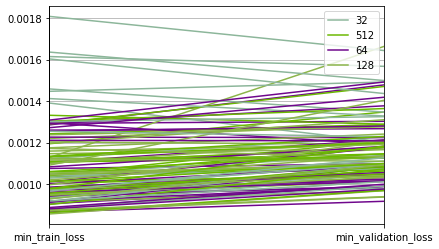

In [50]:
    plt.figure()

#     pd.plotting.parallel_coordinates(
#         dataframe[['batch_size', 'hl1_units', 'hl2_units', 'learning_rate', 'min_train_loss', 'min_validation_loss']], 
#         'batch_size')

#     pd.plotting.parallel_coordinates(
#         dataframe[['batch_size', 'learning_rate', 'min_train_loss', 'min_validation_loss']], 
#         'batch_size')

#     pd.plotting.parallel_coordinates(
#         dataframe[['batch_size', 'hl1_units', 'hl2_units', 'learning_rate']], 
#         'batch_size')

    pd.plotting.parallel_coordinates(
        dataframe[['batch_size', 'min_train_loss', 'min_validation_loss']], 
        'batch_size')

    # Show the plot
    plt.show()

# print("dataframe['min_validation_loss']")
# print(dataframe['min_validation_loss'])

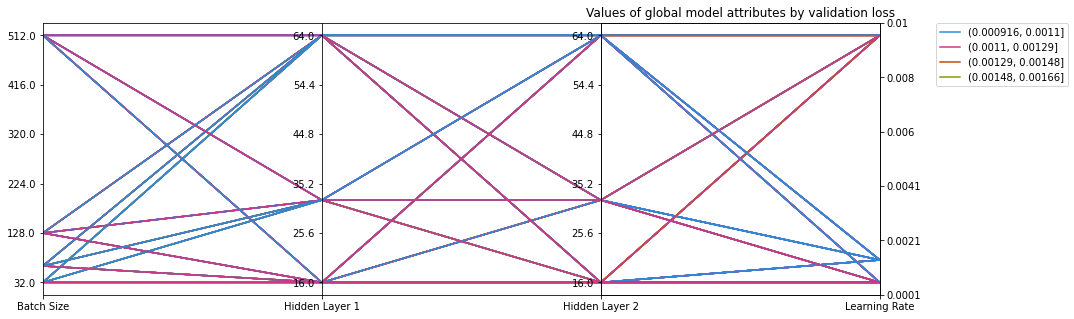

<Figure size 432x288 with 0 Axes>

In [69]:
from matplotlib import ticker

dataframe = pd.read_csv(filepath, header=0)
# print("dataframe['min_validation_loss'] initial")
# print(dataframe['min_validation_loss'])

cols = ['batch_size', 'hl1_units', 'hl2_units', 'learning_rate']
col_labels = ['Batch Size', 'Hidden Layer 1', 'Hidden Layer 2', 'Learning Rate']
x = [i for i, _ in enumerate(cols)]
colours = ['#2e8ad8', '#cd3785', '#c64c00', '#889a00']

# print("dataframe['min_validation_loss'] final")
# print(dataframe['min_validation_loss'])

# dataframe['min_validation_loss'] = pd.cut(dataframe['min_validation_loss'], [0.000916, 0.0011, 0.00129, 0.00148, 0.00166])
dataframe['loss_bucket'] = pd.cut(dataframe['min_validation_loss'], 4)

# create dict of categories: colours
colours = {dataframe['loss_bucket'].cat.categories[i]: colours[i] for i, _ in enumerate(dataframe['loss_bucket'].cat.categories)}

# Create (X-1) sublots along x axis
fig, axes = plt.subplots(1, len(x)-1, sharey=False, figsize=(15,5))

# Get min, max and range for each column
# Normalize the data for each column
min_max_range = {}
for col in cols:
    min_max_range[col] = [dataframe[col].min(), dataframe[col].max(), np.ptp(dataframe[col])]
#     if col == "learning_rate":
#         print("min_max_range[col]")
#         print(dataframe[col])
#         print(min_max_range[col])
    dataframe[col] = np.true_divide(dataframe[col] - dataframe[col].min(), np.ptp(dataframe[col]))
#     if col == "learning_rate":
#         print("min_max_range[col]")
#         print(dataframe[col])
#         print(min_max_range[col])

# Plot each row
for i, ax in enumerate(axes):
    for idx in dataframe.index:
        loss_category = dataframe.loc[idx, 'min_validation_loss']

        for interval in colours.keys():
            if loss_category in interval:
                ax.plot(x, dataframe.loc[idx, cols], colours[interval])
    ax.set_xlim([x[i], x[i+1]])
    
# Set the tick positions and labels on y axis for each plot
# Tick positions based on normalised data
# Tick labels are based on original data
def set_ticks_for_axis(dim, ax, ticks):
    min_val, max_val, val_range = min_max_range[cols[dim]]
    step = val_range / float(ticks-1)
    tick_labels = [round(min_val + step * i, 2) for i in range(ticks)]
    if cols[dim] == "learning_rate":
        tick_labels = [round(min_val + step * i, 4) for i in range(ticks)]
    norm_min = dataframe[cols[dim]].min()
    norm_range = np.ptp(dataframe[cols[dim]])
    norm_step = norm_range / float(ticks-1)
    ticks = [round(norm_min + norm_step * i, 2) for i in range(ticks)]
    ax.yaxis.set_ticks(ticks)
    ax.set_yticklabels(tick_labels)

for dim, ax in enumerate(axes):
    ax.xaxis.set_major_locator(ticker.FixedLocator([dim]))
    set_ticks_for_axis(dim, ax, ticks=6)
    ax.set_xticklabels([col_labels[dim]])
    

# Move the final axis' ticks to the right-hand side
ax = plt.twinx(axes[-1])
dim = len(axes)
ax.xaxis.set_major_locator(ticker.FixedLocator([x[-2], x[-1]]))
set_ticks_for_axis(dim, ax, ticks=6)
ax.set_xticklabels([col_labels[-2], col_labels[-1]])


# Remove space between subplots
plt.subplots_adjust(wspace=0)

# Add legend to plot
plt.legend(
    [plt.Line2D((0,1),(0,0), color=colours[cat]) for cat in dataframe['loss_bucket'].cat.categories],
    dataframe['loss_bucket'].cat.categories,
    bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.)

plt.title("Values of global model attributes by validation loss")

plt.show()
plt.savefig('global_model_parallel_chart.png')